# Random Forest Model Tuning

**NOTE: I was having issues with GridSearchCV on AWS. As such, I could not automatically optimize for my hyper-parameters.**

In [13]:
%matplotlib inline
import pickle
%run helper_functions.py
%run s3.py
%run show_cnf_mtx.py
pd.options.display.max_columns = 1000
plt.rcParams["figure.figsize"] = (15,10)
from datetime import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.externals import joblib

import warnings
warnings.filterwarnings("ignore")

import plotly.plotly as py
import plotly.graph_objs as go


In [2]:
from IPython.display import Image

In [7]:
working_bucket = 'gabr-project-3'

In [10]:
df = unpickle_object("rf_df.pkl")

In [11]:
y = df['loan_status_Late'].values
df.drop('loan_status_Late', inplace=True, axis=1)
X = df.values

Below I created a simple for loop to test out our random forest model with a range of different parameters.

A much cleaner implementation of this would be via gridsearchCV, however, due to some technical difficulties on AWS. I have had to implment it this way!

Later on in this notebook, I fun a loop with the best model I could find. Intermediate testing and analysis has been ommitted in this notebook for brevity.

In [4]:
model_params = [{"criterion":'entropy', "min_samples_split": 10, "class_weight": 'balanced'}, {"criterion":'entropy', "min_samples_split":9, "class_weight": 'balanced'}, {"criterion":'entropy', "min_samples_split":8, "class_weight": 'balanced'}, {"criterion":'entropy', "min_samples_split":7, "class_weight": 'balanced'}, {"criterion":'entropy', "min_samples_split":6, "class_weight": 'balanced'}, {"criterion":'entropy', "min_samples_split":5, "class_weight": 'balanced'}, {"criterion":'gini', "min_samples_split":10, "class_weight": 'balanced'}, {"criterion":'gini', "min_samples_split":9, "class_weight": 'balanced'}, {"criterion":'gini', "min_samples_split":8, "class_weight": 'balanced'}, {"criterion":'gini', "min_samples_split":7, "class_weight": 'balanced'}, {"criterion":'gini', "min_samples_split":6, "class_weight": 'balanced'}, {"criterion":'gini', "min_samples_split":5, "class_weight": 'balanced'}]


In [5]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=222)


In [16]:
def best_features(feature_importance_list):
	all_features = []
	
	for index, importance_val in enumerate(feature_importance_list):
		all_features.append((index,importance_val))
	
	all_features = sorted(all_features, key=lambda x: x[1], reverse=True)
	
	best_features = all_features[:35]
	
	for i in best_features:
	    print(df.columns[i[0]])
	    try:
	        print(lookup_description(df.columns[i[0]]))
	    except:
	        print("DUMMY VARIABLE!")
	    print()

In [15]:
target_names = ["PAID", "CHARGED OFF"]

{'min_samples_split': 10, 'class_weight': 'balanced', 'criterion': 'entropy'}


             precision    recall  f1-score   support

       PAID       0.79      0.90      0.84    396204
CHARGED OFF       0.54      0.35      0.43    141804

avg / total       0.73      0.75      0.73    538008


Accuracy Score:  0.75148324932

F1 score - Binary:  0.426182792007

F1 score - Micro:  0.75148324932

F1 score - Weighted:  0.731957689491




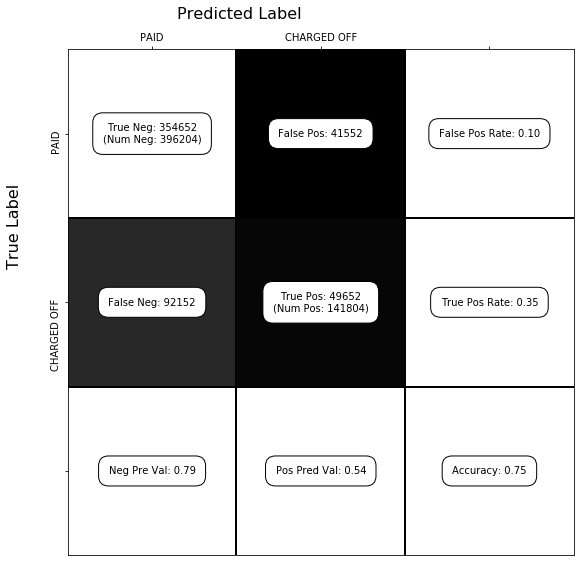

{'min_samples_split': 9, 'class_weight': 'balanced', 'criterion': 'entropy'}


             precision    recall  f1-score   support

       PAID       0.79      0.90      0.84    396204
CHARGED OFF       0.55      0.34      0.42    141804

avg / total       0.73      0.75      0.73    538008


Accuracy Score:  0.752221156563

F1 score - Binary:  0.418449833571

F1 score - Micro:  0.752221156563

F1 score - Weighted:  0.730786279261




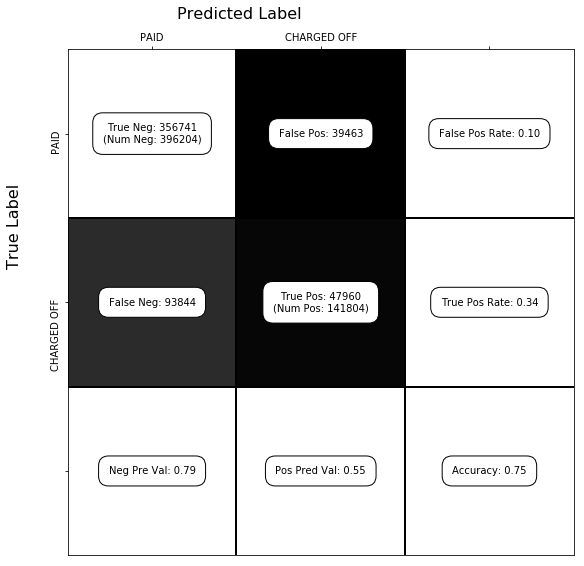

{'min_samples_split': 8, 'class_weight': 'balanced', 'criterion': 'entropy'}


             precision    recall  f1-score   support

       PAID       0.79      0.91      0.84    396204
CHARGED OFF       0.55      0.33      0.41    141804

avg / total       0.73      0.75      0.73    538008


Accuracy Score:  0.752758323296

F1 score - Binary:  0.410939977149

F1 score - Micro:  0.752758323296

F1 score - Weighted:  0.729522610493




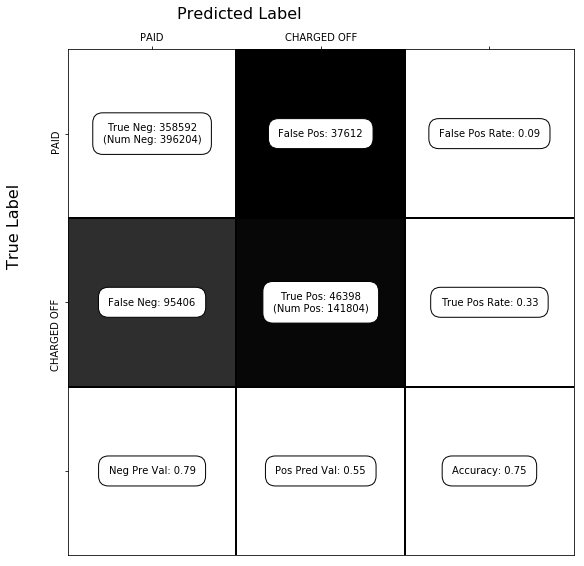

{'min_samples_split': 7, 'class_weight': 'balanced', 'criterion': 'entropy'}


             precision    recall  f1-score   support

       PAID       0.79      0.91      0.85    396204
CHARGED OFF       0.56      0.31      0.40    141804

avg / total       0.73      0.75      0.73    538008


Accuracy Score:  0.75417837653

F1 score - Binary:  0.401668491391

F1 score - Micro:  0.75417837653

F1 score - Weighted:  0.728380585811




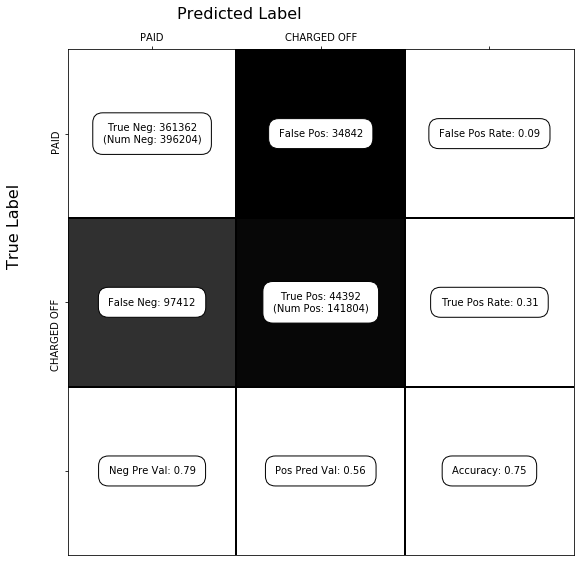

{'min_samples_split': 6, 'class_weight': 'balanced', 'criterion': 'entropy'}


             precision    recall  f1-score   support

       PAID       0.78      0.92      0.85    396204
CHARGED OFF       0.56      0.30      0.39    141804

avg / total       0.73      0.75      0.73    538008


Accuracy Score:  0.753923733476

F1 score - Binary:  0.388598715231

F1 score - Micro:  0.753923733476

F1 score - Weighted:  0.725414934193




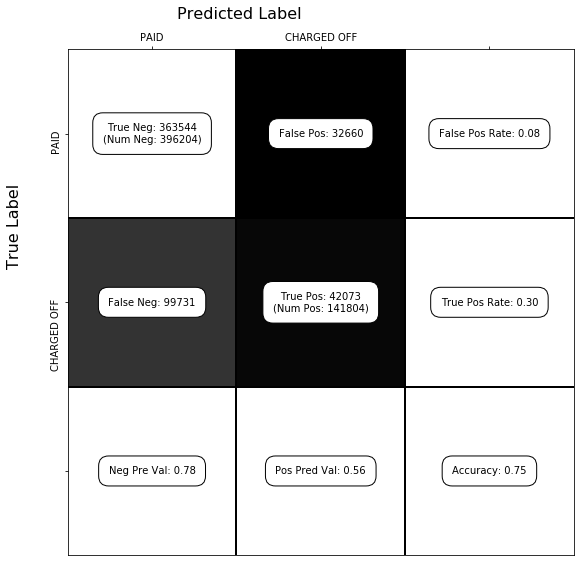

{'min_samples_split': 5, 'class_weight': 'balanced', 'criterion': 'entropy'}


             precision    recall  f1-score   support

       PAID       0.78      0.92      0.85    396204
CHARGED OFF       0.57      0.28      0.38    141804

avg / total       0.73      0.76      0.72    538008


Accuracy Score:  0.75503709982

F1 score - Binary:  0.376864083821

F1 score - Micro:  0.75503709982

F1 score - Weighted:  0.723493446381




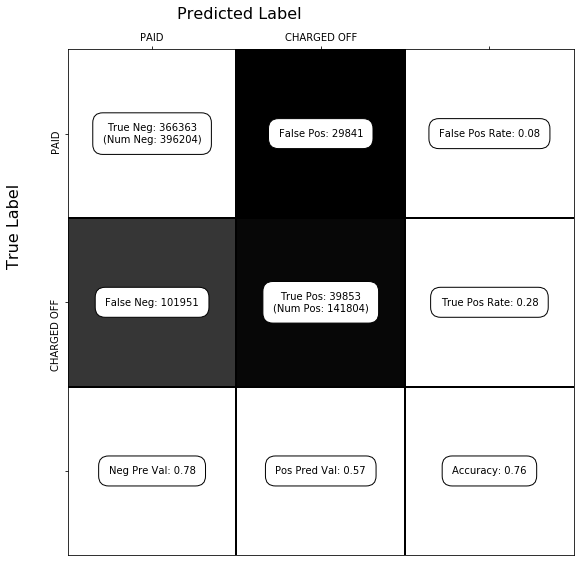

{'min_samples_split': 10, 'class_weight': 'balanced', 'criterion': 'gini'}


             precision    recall  f1-score   support

       PAID       0.80      0.89      0.84    396204
CHARGED OFF       0.54      0.36      0.43    141804

avg / total       0.73      0.75      0.73    538008


Accuracy Score:  0.749048341289

F1 score - Binary:  0.432428115016

F1 score - Micro:  0.749048341289

F1 score - Weighted:  0.731773806241




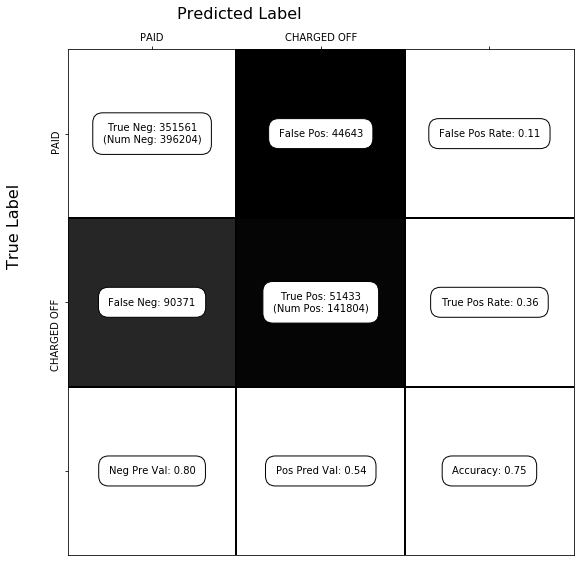

{'min_samples_split': 9, 'class_weight': 'balanced', 'criterion': 'gini'}


             precision    recall  f1-score   support

       PAID       0.79      0.89      0.84    396204
CHARGED OFF       0.54      0.35      0.43    141804

avg / total       0.73      0.75      0.73    538008


Accuracy Score:  0.749970260665

F1 score - Binary:  0.425171143607

F1 score - Micro:  0.749970260665

F1 score - Weighted:  0.730839560962




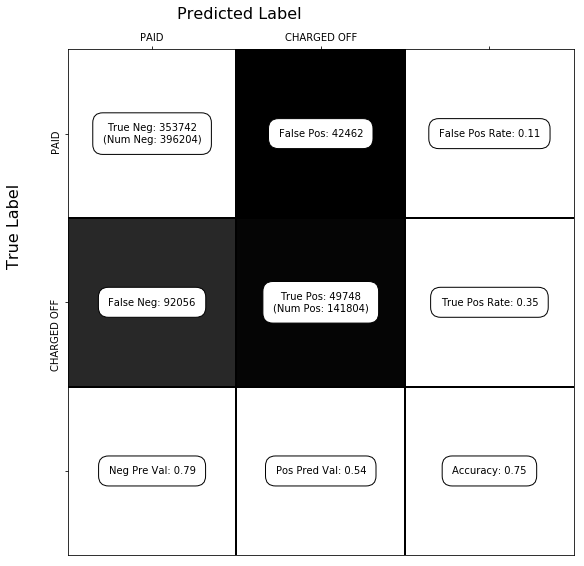

{'min_samples_split': 8, 'class_weight': 'balanced', 'criterion': 'gini'}


             precision    recall  f1-score   support

       PAID       0.79      0.90      0.84    396204
CHARGED OFF       0.54      0.34      0.42    141804

avg / total       0.73      0.75      0.73    538008


Accuracy Score:  0.75071746145

F1 score - Binary:  0.417104908599

F1 score - Micro:  0.75071746145

F1 score - Weighted:  0.729609791722




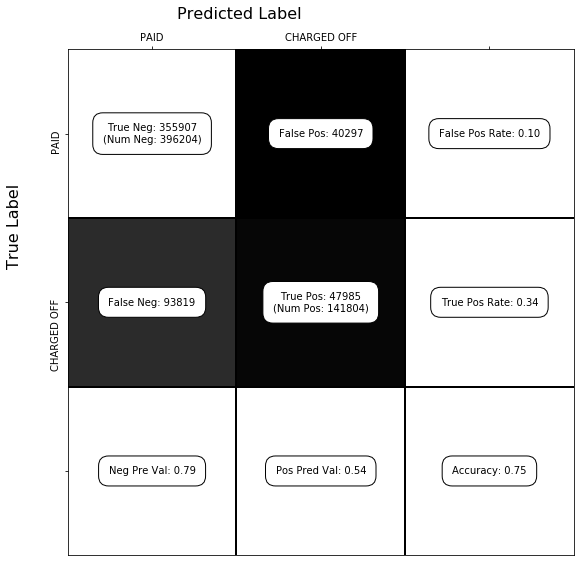

{'min_samples_split': 7, 'class_weight': 'balanced', 'criterion': 'gini'}


             precision    recall  f1-score   support

       PAID       0.79      0.91      0.84    396204
CHARGED OFF       0.55      0.32      0.41    141804

avg / total       0.73      0.75      0.73    538008


Accuracy Score:  0.751860567129

F1 score - Binary:  0.407254967255

F1 score - Micro:  0.751860567129

F1 score - Weighted:  0.728213033555




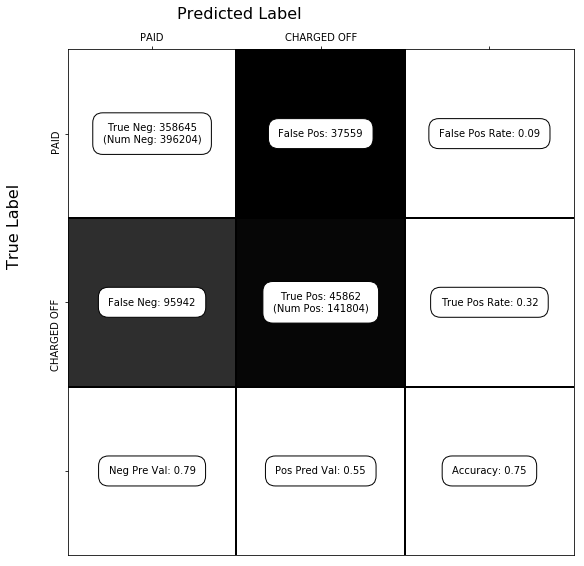

{'min_samples_split': 6, 'class_weight': 'balanced', 'criterion': 'gini'}


             precision    recall  f1-score   support

       PAID       0.79      0.91      0.84    396204
CHARGED OFF       0.55      0.31      0.40    141804

avg / total       0.73      0.75      0.73    538008


Accuracy Score:  0.752481375742

F1 score - Binary:  0.396650854277

F1 score - Micro:  0.752481375742

F1 score - Weighted:  0.726315256077




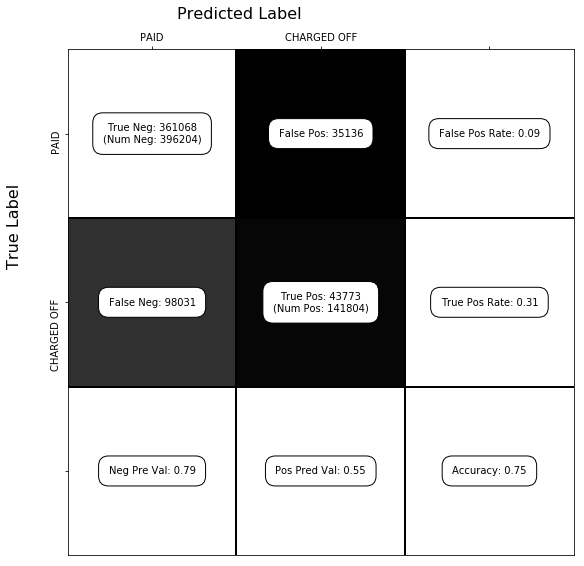

{'min_samples_split': 5, 'class_weight': 'balanced', 'criterion': 'gini'}


             precision    recall  f1-score   support

       PAID       0.78      0.92      0.85    396204
CHARGED OFF       0.56      0.29      0.38    141804

avg / total       0.72      0.75      0.72    538008


Accuracy Score:  0.753172815274

F1 score - Binary:  0.382759373998

F1 score - Micro:  0.753172815274

F1 score - Weighted:  0.72371393312




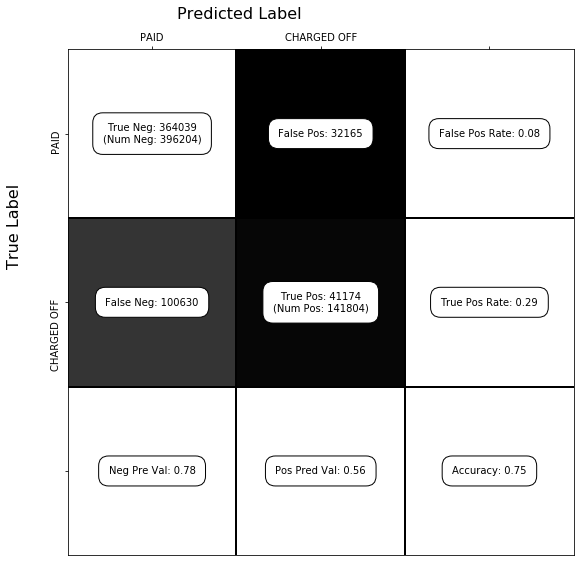

In [8]:
for param_dict in model_params:
	model = RandomForestClassifier(n_estimators=23, n_jobs=-1, criterion=param_dict['criterion'], min_samples_split=param_dict["min_samples_split"], class_weight=param_dict["class_weight"], random_state=222)
	print(param_dict)
	print()
	y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
	print()
	print(classification_report(y, y_pred,target_names=target_names))
	print()
	cnf_matrix = confusion_matrix(y, y_pred)
	print("Accuracy Score: ", np.median(accuracy_score(y, y_pred)))
	print()
	print("F1 score - Binary: ", np.median(f1_score(y, y_pred, average='binary')))
	print()
	print("F1 score - Micro: ", np.median(f1_score(y, y_pred, average='micro')))
	print()
	print("F1 score - Weighted: ", np.median(f1_score(y, y_pred, average='weighted')))
	print()
	show_confusion_matrix(cnf_matrix, class_labels=target_names)

In [10]:
cv2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=222)

Let's contast our best model so far with no class weights.

             precision    recall  f1-score   support

       PAID       0.77      0.96      0.85    396204
CHARGED OFF       0.63      0.21      0.31    141804

avg / total       0.73      0.76      0.71    538008


Accuracy Score:  0.758761951495

F1 score - Binary:  0.311323357742

F1 score - Micro:  0.758761951495

F1 score - Weighted:  0.710795527609



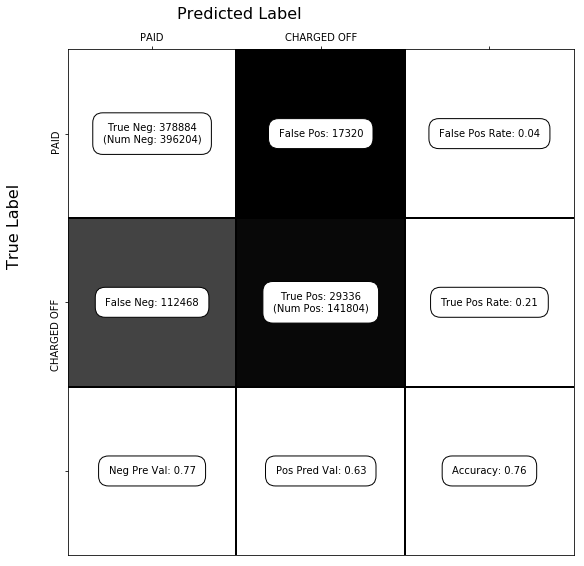

In [11]:
model2 = RandomForestClassifier(n_estimators=23, n_jobs=-1, criterion='gini', min_samples_split=10, class_weight=None, random_state=222)

y_pred = cross_val_predict(model2, X, y, cv=cv2, n_jobs=-1)

print(classification_report(y, y_pred,target_names=target_names))

print()

cnf_matrix = confusion_matrix(y, y_pred)

print("Accuracy Score: ", np.median(accuracy_score(y, y_pred)))

print()

print("F1 score - Binary: ", np.median(f1_score(y, y_pred, average='binary')))
print()
print("F1 score - Micro: ", np.median(f1_score(y, y_pred, average='micro')))
print()
print("F1 score - Weighted: ", np.median(f1_score(y, y_pred, average='weighted')))
print()
show_confusion_matrix(cnf_matrix, class_labels=target_names)

From the above we can see that by having no weights, we obtain a significatnly worse F1 Binary score!

What if we increase the min_sample_split variable?

Upon doing some experimentation (ommitted in this notebook) I found that the following random forest performed the best wtih regards to F1 score and accuracy:

- 'min_samples_split': 40
- 'class_weight': 'balanced'
- 'criterion': 'entropy'
- n_estimators = 50

I will now re-run this model will 100 estimators and 11 fold cross validation to produce our final model! I will also pickle this model for later use!

             precision    recall  f1-score   support

       PAID       0.82      0.82      0.82    396204
CHARGED OFF       0.51      0.50      0.51    141804

avg / total       0.74      0.74      0.74    538008


Accuracy Score:  0.74032542267

F1 score - Binary:  0.505768108252

F1 score - Micro:  0.74032542267

F1 score - Weighted:  0.740049574108



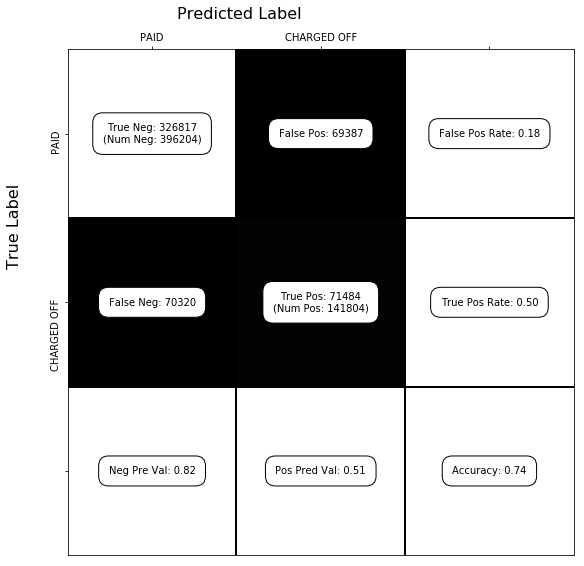



int_rate
Interest Rate on the loan

dti
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

term_ 60 months
DUMMY VARIABLE!

annual_inc
The self-reported annual income provided by the borrower during registration.

bc_open_to_buy
Total open to buy on revolving bankcards.

revol_util
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

installment
The monthly payment owed by the borrower if the loan originates.

avg_cur_bal
Average current balance of all accounts

tot_hi_cred_lim
Total high credit/credit limit

revol_bal
Total credit revolving balance

funded_amnt_inv
The total amount committed by investors for that loan at that point in time.

bc_util
Ratio of total current balance to high credit/credit limit for all bankcard accounts.

tot_cur_bal
Total current bala

In [17]:
final_cv = StratifiedKFold(n_splits=11, shuffle=True, random_state=222)

final_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, criterion='entropy', min_samples_split=40, class_weight='balanced', random_state=223)

y_pred = cross_val_predict(final_model, X, y, cv=final_cv, n_jobs=-1)

print(classification_report(y, y_pred,target_names=target_names))

print()

cnf_matrix = confusion_matrix(y, y_pred)

print("Accuracy Score: ", np.median(accuracy_score(y, y_pred)))

print()

print("F1 score - Binary: ", np.median(f1_score(y, y_pred, average='binary')))
print()
print("F1 score - Micro: ", np.median(f1_score(y, y_pred, average='micro')))
print()
print("F1 score - Weighted: ", np.median(f1_score(y, y_pred, average='weighted')))
print()
show_confusion_matrix(cnf_matrix, class_labels=target_names)
print()
fit_object = final_model.fit(X,y)
print()

best_features(fit_object.feature_importances_)
print()
joblib.dump(fit_object, 'rf_model_final.pkl');

proba = cross_val_predict(final_model, X, y, cv=final_cv, method='predict_proba')

In [3]:
proba = unpickle_object("proba_rf_model.pkl")

In [14]:
fpr, tpr, thresholds = roc_curve(y, proba[:, 1])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y, proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 2

trace1 = go.Scatter(x=fpr[1], y=tpr[1], 
                    mode='lines', 
                    line=dict(color='darkorange', width=lw),
                    name='ROC curve (area = %0.2f)' % roc_auc[1]
                   )

trace2 = go.Scatter(x=[0, 1], y=[0, 1], 
                    mode='lines', 
                    line=dict(color='navy', width=lw, dash='dash'),
                    showlegend=False)


layout = go.Layout(title='Receiver operating characteristic example',
                   xaxis=dict(title='False Positive Rate'),
                   yaxis=dict(title='True Positive Rate'))

fig = go.Figure(data=[trace1, trace2], layout=layout)

py.iplot(fig);

The draw time for this plot will be slow for all clients.


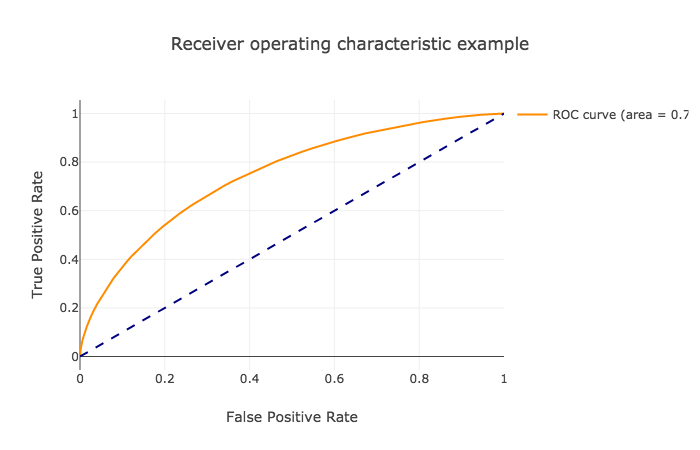

In [3]:
Image("newplot.png") #static image as pyplot isnt interactive when uploading notebook to Github

In [19]:
# pickle_object(proba, "probabilities_array_rf_model_final")

In [20]:
# upload_to_bucket("rf_model_final.pkl", "rf_final_model", working_bucket)

rf_model_final.pkl uploaded to gabr-project-3 bucket with a key of rf_final_model


In [21]:
# upload_to_bucket("probabilities_array_rf_model_final.pkl", "proba_rf_model", working_bucket)

probabilities_array_rf_model_final.pkl uploaded to gabr-project-3 bucket with a key of proba_rf_model


In [15]:
# view_keys_in_bucket(working_bucket)